<a href="https://colab.research.google.com/github/Requenamar3/Data-Mining/blob/main/Module4.%20Online%20Retai%20summit%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Running the Apriori Algorithm and Finding Association Rules in Online Retail Datasets


**Apply the Apriori algorithm and association rule mining to areal-world dataset**

##Data Loading

In [ ]:
!pip install mlxtend -qqq

The command !pip install mlxtend -qqq silently installs the mlxtend library in the Jupyter notebook. The mlxtend package provides additional tools for data science and machine learning tasks. The -qqq option makes the installation process quiet, minimizing output to keep the environment tidy.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import mlxtend.frequent_patterns
import mlxtend.preprocessing
import numpy
import datetime as dt
!pip install matplotlib
retail = pd.read_excel(
    io="https://github.com/fenago/datasets/raw/main/Online%20Retail%20(5).xlsx",
    sheet_name="Online Retail",
    header=0
)

# EDA

In [ ]:
 # installing the pandas_profiling package for data analysis and generating statistical report summaries.
!pip install ydata_profiling

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 28.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=8ac56700e8e48918c063f5443779de15e1b62419d18fc9016d89b529f5567784
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [ ]:
retail.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCPresent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0


In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   IsCPresent   541909 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 37.2+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#number of rows and columns
print("Data dimension (row count, col count): {dim}".format(dim=retail.shape))

# prints the number of unique invoice numbers present in the InvoiceNo
print("Count of unique invoice numbers: {cnt}".format(cnt=retail.InvoiceNo.nunique()))

#prints the count of unique customer IDs in the CustomerID
print("Count of unique customer ids: {cnt}".format(cnt=retail.CustomerID.nunique()))

Data dimension (row count, col count): (541909, 9)
Count of unique invoice numbers: 25900
Count of unique customer ids: 4372


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
unique_invoice_nos = retail['InvoiceNo'].unique()

# Displaying the first 50 unique InvoiceNos
first_50_unique_invoice_nos = unique_invoice_nos[:50]
print(first_50_unique_invoice_nos)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[536365 536366 536367 536368 536369 536370 536371 536372 536373 536374
 536375 536376 536377 536378 536380 536381 'C536379' 536382 'C536383'
 536384 536385 536386 536387 536388 536389 536390 'C536391' 536392 536393
 536394 536395 536396 536397 536398 536399 536400 536401 536402 536403
 536404 536405 536406 536407 536408 536409 536412 536414 536415 536416
 536420]


In [ ]:
invoice_numbers_to_display = ['C536379', 'C536383', 'C536391']
records_with_c = retail[retail['InvoiceNo'].isin(invoice_numbers_to_display)]
print(records_with_c)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


    InvoiceNo StockCode                        Description  Quantity  \
141   C536379         D                           Discount        -1   
154   C536383    35004C    SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556     PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984   PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983   PACK OF 12 BLUE PAISLEY TISSUES        -24   
238   C536391     21980  PACK OF 12 RED RETROSPOT TISSUES        -24   
239   C536391     21484        CHICK GREY HOT WATER BOTTLE       -12   
240   C536391     22557   PLASTERS IN TIN VINTAGE PAISLEY        -12   
241   C536391     22553             PLASTERS IN TIN SKULLS       -24   

            InvoiceDate  UnitPrice  CustomerID         Country  IsCPresent  
141 2010-12-01 09:41:00      27.50     14527.0  United Kingdom           1  
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom           1  
235 2010-12-01 10:24:00       1.65     17548.0  

# Data Cleaning and Formatting

In [ ]:
# adds new column to the 'retail' dataframe named 'IsCPresent'.

retail['IsCPresent'] = (
    # Start with the 'InvoiceNo' column of the 'retail' dataframe
    retail['InvoiceNo']
    # Convert the 'InvoiceNo' column to string type to enable string operations
    .astype(str)
    # Apply a lambda function to each element in the 'InvoiceNo' column
    .apply(lambda x:
           # If 'C' is found in the invoice number string, set the element to 1
           1 if x.find('C') != -1
           # Otherwise, if 'C' is not found, set the element to 0
           else 0
          )
)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
retail.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# new data frame retail1 to hold the cleaned or transformed data from the original df retail
retail1 = (
    retail
    # Filter out non-positive quantity values.
    .loc[retail["Quantity"] > 0]
    # Remove InvoiceNos starting with 'C' by checking a flag 'IsCPresent' that indicates such values.
    .loc[retail['IsCPresent'] != 1]
    # Keep only the 'InvoiceNo' and 'Description' columns.
    .loc[:, ["InvoiceNo", "Description"]]
    # Drop all rows with at least one missing value in any of the remaining columns.
    .dropna()
)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
retail1.head(10)

In [ ]:
# count of rows and columns in the dataframe.
print("Data dimension (row count, col count): {dim}".format(dim=retail1.shape))

# number of unique transactions present in the data.
print("Count of unique invoice numbers: {cnt}".format(cnt=retail1.InvoiceNo.nunique()))


Data dimension (row count, col count): (530693, 2)
Count of unique invoice numbers: 20136


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# extract unique invoice numbers as list
# convert the 'InvoiceNo' column to a list
invoice_no_list = retail1.InvoiceNo.tolist()
# use 'set' to remove any duplicates, converting the list back to a list type
invoice_no_list = list(set(invoice_no_list))

# print the length of the list/ the count of unique invoice numbers
print("Length of list of invoice numbers: {ln}".format(ln=len(invoice_no_list)))


Length of list of invoice numbers: 20136


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


By converting the column to a set, it ensures that all duplicates are removed since a set can only contain unique elements. Converting the set back to a list allows for potential further operations that require list functionality.

In [ ]:
# Selecting the first 5000 unique invoice numbers from the list to create a subset
subset_invoice_no_list = invoice_no_list[0:5000]

# Print the length of the subset list to confirm the number of invoice numbers it contains
print("Length of subset list of invoice numbers: {ln}".format(ln=len(subset_invoice_no_list)))


Length of subset list of invoice numbers: 5000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


This smaller subset is useful for exercises, demonstrations, or performance reasons when working with large datasets.

In [ ]:
# filter data set down to based on
# subset of invoice number list
retail1 = retail1.loc[retail1["InvoiceNo"].isin(subset_invoice_no_list)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
retail1.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.
5,536365,SET 7 BABUSHKA NESTING BOXES
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER
7,536366,HAND WARMER UNION JACK
8,536366,HAND WARMER RED POLKA DOT
9,536367,ASSORTED COLOUR BIRD ORNAMENT


In [ ]:
retail1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133313 entries, 0 to 299982
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   InvoiceNo    133313 non-null  object
 1   Description  133313 non-null  object
dtypes: object(2)
memory usage: 3.1+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print("Data dimension (row count, col count): {dim}".format(dim=retail1.shape))
print("Count of unique invoice numbers: {cnt}".format(cnt=retail1.InvoiceNo.nunique()))

Data dimension (row count, col count): (133313, 2)
Count of unique invoice numbers: 5000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
invoice_item_list = []
for num in list(set(retail1.InvoiceNo.tolist())):
    # filter data set down to one invoice number
    tmp_df = retail1.loc[retail1['InvoiceNo'] == num]
    # extract item descriptions and convert to list
    tmp_items = tmp_df.Description.tolist()
    # append list invoice_item_list
    invoice_item_list.append(tmp_items)

print(invoice_item_list[1:5])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT'], ['ASSORTED COLOUR BIRD ORNAMENT', "POPPY'S PLAYHOUSE BEDROOM ", "POPPY'S PLAYHOUSE KITCHEN", 'FELTCRAFT PRINCESS CHARLOTTE DOLL', 'IVORY KNITTED MUG COSY ', 'BOX OF 6 ASSORTED COLOUR TEASPOONS', 'BOX OF VINTAGE JIGSAW BLOCKS ', 'BOX OF VINTAGE ALPHABET BLOCKS', 'HOME BUILDING BLOCK WORD', 'LOVE BUILDING BLOCK WORD', 'RECIPE BOX WITH METAL HEART', 'DOORMAT NEW ENGLAND'], ['JAM MAKING SET WITH JARS', 'RED COAT RACK PARIS FASHION', 'YELLOW COAT RACK PARIS FASHION', 'BLUE COAT RACK PARIS FASHION'], ['BATH BUILDING BLOCK WORD']]


The code creates a list named invoice_item_list, where each element is a list of item descriptions that were purchased together under a single invoice number from the retail1 dataframe. It does so by iterating through each unique invoice number, filtering the dataframe for that invoice number to get all associated items, and then collecting their descriptions into a sublist. Each sublist is then appended to invoice_item_list. Finally, it prints a sample of these sublists to give an overview of the types of transactions contained within the list.

# Data Encoding

In [ ]:
# Initialize a TransactionEncoder, a tool for converting transactions into a one-hot encoded format.
online_encoder = mlxtend.preprocessing.TransactionEncoder()

# Fit the TransactionEncoder on 'invoice_item_list' and transform the list of transactions into a one-hot encoded array.
# 'invoice_item_list' contains each transaction as a list of item descriptions.
online_encoder_array = online_encoder.fit_transform(invoice_item_list)

# Print the one-hot encoded array to see the encoded format of transactions.
print(online_encoder_array)



[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**TransactionEncoder** transforms the transactional data **(invoice_item_list)** into a format where each row represents a transaction and each column corresponds to an item. In the resulting array, a **True** value indicates the presence of the item in a transaction, and **False** indicates its absence. This format is essential for algorithms that mine for patterns or associations between items within transactions.

In [ ]:
# Convert the one-hot encoded array into a pandas DataFrame for easier data manipulation and analysis.
# The columns of the DataFrame are set to the unique items identified by the TransactionEncoder.
online_encoder_df = pd.DataFrame(
    online_encoder_array,
    columns=online_encoder.columns_
)

# To simplify viewing the large table, print a subset of the DataFrame.
# Here, rows 4970 to 4979 and the first 8 columns are selected for display.
# This helps in quickly checking the encoding results without loading the entire table.
online_encoder_df.loc[
    4970:4979,
    online_encoder_df.columns.tolist()[0:8]
]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,4 PURPLE FLOCK DINNER CANDLES,OVAL WALL MIRROR DIAMANTE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS
4970,False,False,False,False,False,False,False,False
4971,False,False,False,False,False,False,False,False
4972,False,False,False,False,False,False,False,False
4973,False,False,False,False,False,False,False,False
4974,False,False,True,False,False,False,False,False
4975,False,False,False,False,False,False,False,False
4976,False,False,False,False,False,False,False,False
4977,False,False,False,False,False,False,False,False
4978,False,False,False,False,False,False,False,False
4979,False,False,False,False,False,False,False,False


After encoding transactional data with **TransactionEncoder,** this code creates a **DataFrame named online_encoder_df** from the one-hot encoded array. This **DataFrame** is structured so that each row corresponds to a transaction and each column represents a different item, with cells containing **True** or **False** depending on the item's presence in the transaction. The last part of the code is for displaying a manageable portion of the data, specifically **rows 4970 to 4979** and the first 8 columns, allowing for a concise view of the encoded data without overwhelming the user.

In [ ]:
print("Data dimension (row count, col count): {dim}".format(dim=online_encoder_df.shape))

Data dimension (row count, col count): (5000, 3136)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Part 1: Running the Apriori Algorithm on the Complete Online Retail Dataset

The **Apriori algorithm** is a data mining technique used for finding frequent itemsets and deriving association rules from a dataset. It's widely used in market basket analysis to discover products that are commonly purchased together by analyzing large volumes of transaction data. The algorithm works by identifying itemsets that appear together in transactions with a frequency above a user-specified threshold (the support), then using those itemsets to generate rules that can predict the occurrence of an item based on the presence of other items.

### 1.Run the Apriori Algorithm: Apply the Apriori algorithm to the full dataset. Set parameters to identify item sets appearing in at least 1% of transactions.


In [ ]:
# Import the necessary function from mlxtend
from mlxtend.frequent_patterns import apriori

# Apply the apriori algorithm to find frequent itemsets within the DataFrame.
# The apriori function returns a DataFrame with the frequent itemsets and their support values.
# Support is the fraction of transactions that contain a given itemset.
# mod = mlxtend.frequent_patterns.apriori(online_encoder_df, use_colnames=True, min_support=0.01)

mod = mlxtend.frequent_patterns.apriori(online_encoder_df)

# Display the frequent itemsets found by the apriori algorithm.
print(mod)


Empty DataFrame
Columns: [support, itemsets]
Index: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



This code applies the **apriori** algorithm to the **online_encoder_d**f DataFrame, identifying frequent itemsets (groups of items often bought together) with a minimum occurrence threshold of 1% **(min_support=0.01)**. The resulting itemsets and their support values are stored in **mod**, a DataFrame that is then printed to display these frequent itemsets and how often they occur in the transactions.

In [ ]:
# Run the apriori algorithm on the one-hot encoded DataFrame 'online_encoder_df'.
# The 'min_support' parameter is set to 0.05, meaning only itemsets appearing in at least 5% of transactions are considered.
mod_minsupport = mlxtend.frequent_patterns.apriori(
    online_encoder_df,
    min_support=0.01
)

# Display the first 7 rows (index 0 to 6) of the resulting DataFrame 'mod_minsupport'.
# This DataFrame contains the frequent itemsets identified by the apriori algorithm and their respective support values,
# showcasing some of the most common combinations of items bought together.
mod_minsupport.loc[0:6]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.0110,(1)
1,0.0340,(2)
2,0.0178,(6)
3,0.0126,(10)
4,0.0132,(11)
5,0.0178,(12)
6,0.0276,(13)



*   Support: checks how often items are bought together.
*   Confidence shows how likely you are to buy one item if you've already bought another

*   Lift tells you if one item really boosts the sale of another.
*   Leverage measures extra frequency of buying items together than if they were independent.


*   Conviction indicates the dependence of one item's purchase on another.


In [ ]:
# add colnames for easier interpretability

mod_colnames_minsupport = mlxtend.frequent_patterns.apriori(
    online_encoder_df,
    min_support=0.01,
    use_colnames=True
)
mod_colnames_minsupport.loc[0:6]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.0110,( OVAL WALL MIRROR DIAMANTE )
1,0.0340,( SET 2 TEA TOWELS I LOVE LONDON )
2,0.0178,(10 COLOUR SPACEBOY PEN)
3,0.0126,(12 IVORY ROSE PEG PLACE SETTINGS)
4,0.0132,(12 MESSAGE CARDS WITH ENVELOPES)
5,0.0178,(12 PENCIL SMALL TUBE WOODLAND)
6,0.0276,(12 PENCILS SMALL TUBE RED RETROSPOT)


In [ ]:
# Add a new column 'length' to the DataFrame 'mod_colnames_minsupport'.
# This column will contain the number of items in each itemset.
mod_colnames_minsupport['length'] = (
    mod_colnames_minsupport['itemsets'].apply(lambda x: len(x))
)

# Display a range of rows from the DataFrame, specifically rows indexed from 180 to 296.
# This subset shows the frequent itemsets and their lengths for the specified range of rows.
mod_colnames_minsupport.loc[180:296]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
180,0.0208,(COFFEE MUG CAT + BIRD DESIGN),1
181,0.0142,(COFFEE MUG DOG + BALL DESIGN),1
182,0.0132,(COFFEE MUG PEARS DESIGN),1
183,0.0240,(COLOUR GLASS T-LIGHT HOLDER HANGING),1
184,0.0224,(COLOURING PENCILS BROWN TUBE),1
...,...,...,...
292,0.0134,(FRYING PAN UNION FLAG),1
293,0.0154,(FULL ENGLISH BREAKFAST PLATE),1
294,0.0148,(FUNKY WASHING UP GLOVES ASSORTED),1
295,0.0344,(GARLAND WOODEN HAPPY EASTER),1


In [ ]:
# Sort the 'mod_colnames_minsupport' DataFrame in descending order by the 'support' column.
mod_colnames_minsupport = mod_colnames_minsupport.sort_values(by='support', ascending=False)

# After sorting, retrieve and display the first 20 itemsets with the highest support values.
mod_colnames_minsupport.loc[:19]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
826,0.1416,(WHITE HANGING HEART T-LIGHT HOLDER),1
631,0.1196,(REGENCY CAKESTAND 3 TIER),1
689,0.1050,(SET OF 3 CAKE TINS PANTRY DESIGN ),1
400,0.1010,(JUMBO BAG RED RETROSPOT),1
358,0.0890,(HEART OF WICKER SMALL),1
...,...,...,...
1686,0.0112,"(JAM JAR WITH GREEN LID, JAM MAKING SET WITH J...",2
2612,0.0112,"(CHRISTMAS TREE DECORATION WITH BELL, CHRISTMA...",3
1691,0.0112,"(SET OF 3 CAKE TINS PANTRY DESIGN , JAM JAR WI...",2
2428,0.0112,"(SET OF 3 CAKE TINS PANTRY DESIGN , SET 2 PANT...",2


In [ ]:
# Sort the 'mod_colnames_minsupport' DataFrame in descending order by the 'support' column.
mod_colnames_minsupport = mod_colnames_minsupport.sort_values(by='support', ascending=False)

# After sorting, retrieve and display the first 20 itemsets with the highest support values.
mod_colnames_minsupport.loc[:19]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
826,0.1416,(WHITE HANGING HEART T-LIGHT HOLDER),1
631,0.1196,(REGENCY CAKESTAND 3 TIER),1
689,0.1050,(SET OF 3 CAKE TINS PANTRY DESIGN ),1
400,0.1010,(JUMBO BAG RED RETROSPOT),1
358,0.0890,(HEART OF WICKER SMALL),1
...,...,...,...
1686,0.0112,"(JAM JAR WITH GREEN LID, JAM MAKING SET WITH J...",2
2612,0.0112,"(CHRISTMAS TREE DECORATION WITH BELL, CHRISTMA...",3
2667,0.0112,"(SUKI SHOULDER BAG, HEART OF WICKER SMALL, DO...",3
2428,0.0112,"(SET OF 3 CAKE TINS PANTRY DESIGN , SET 2 PANT...",2


"WHITE HANGING HEART T-LIGHT HOLDER" is a single itemset that appears in 14.16% of the transactions, indicating it's relatively more common than others on the list. based on these findings there are several strategies that an online retailer could adopt:

In [ ]:
# Sort the DataFrame 'mod_colnames_minsupport' by 'support' and then by 'length', both in descending order.
# This prioritizes itemsets with the highest support and within those, the ones with the most items.
mod_colnames_minsupport = mod_colnames_minsupport.sort_values(
    by=['support', 'length'], ascending=[False, False]
)

# Display the DataFrame after sorting.
# The DataFrame will show the itemsets with the highest support and length at the top.
mod_colnames_minsupport.loc[180:296]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
180,0.0208,(COFFEE MUG CAT + BIRD DESIGN),1
298,0.0208,(GIN AND TONIC MUG),1
2829,0.0206,"(SET OF 3 CAKE TINS PANTRY DESIGN , SET OF 6 S...",3
1565,0.0206,"(HEART OF WICKER SMALL, JUMBO BAG RED RETROSPOT)",2
2210,0.0206,"(SET/20 RED RETROSPOT PAPER NAPKINS , PACK OF ...",2
...,...,...,...
323,0.0140,(GROW YOUR OWN BASIL IN ENAMEL MUG),1
858,0.0140,(ZINC WILLIE WINKIE CANDLE STICK),1
824,0.0140,(WATERING CAN PINK BUNNY),1
341,0.0140,(HANGING HEN ON NEST DECORATION),1


The items most sold is "COFFEE MUG CAT + BIRD DESIGN" apperars in in 2.08% of the transactions.
The combination of items most sold is
"(SET OF 3 CAKE TINS PANTRY DESIGN, SET OF 6..." is a combination of items that 2.06 % of the transactions and acording to the length, there are 3 items in the set.


### 2.Analysis of Specific Item Set: Filter to the item set containing "10 COLOUR SPACEBOY PEN." Analyze its support value.

In [ ]:
# Filter the DataFrame 'mod_colnames_minsupport' for rows where the 'itemsets' column
# matches the frozenset containing '10 COLOUR SPACEBOY PEN.'.
# A frozenset is used because it is an immutable set, required for this type of operation.
filtered_rows = mod_colnames_minsupport[
    mod_colnames_minsupport['itemsets'] == frozenset({'10 COLOUR SPACEBOY PEN'})
]

# Check if the filtered rows are empty, which would indicate that the itemset was not found.
if filtered_rows.empty:
    print("Itemset not found.")  # Output a message if the itemset is not found.
else:
    # Otherwise, print the filtered rows to display the results.
    print(filtered_rows)  # This will output the support value for the itemset if it is found.



   support                  itemsets  length
2   0.0178  (10 COLOUR SPACEBOY PEN)       1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**10 COLOUR SPACEBOY PEN** is a single item with a support value of 0.0178 meaning this itemset appears in 1.78% of all transactions in the dataset.


A **frozenset** is an immutable version of a Python set. While elements can be added to or removed from a regular set, a frozenset is static after it's created; its items cannot be changed, similar to how you can't change the elements of a tuple after it's created.

This immutability makes frozenset objects hashable, so they can be used as dictionary keys or as elements of another set, which isn't possible with regular mutable sets. In the context of the Apriori algorithm and other frequent itemset mining tasks, frozenset is useful because itemsets need to be checked for inclusion in a collection of other itemsets, and using a hashable, immutable type like frozenset is efficient for this purpose.

### 3.Item Set Length Analysis: Add a column for item set length. Focus on sets of length two with support between 0.02 and 0.021. Compare these to previous results.

In [ ]:
# Filter for itemsets of length 2 and support between 0.020 and 0.021.
filtered_itemsets = mod_colnames_minsupport[
    (mod_colnames_minsupport['length'] == 2) &
    (mod_colnames_minsupport['support'] >= 0.020) &
    (mod_colnames_minsupport['support'] <= 0.021)
]

# Display the filtered itemsets.
print(filtered_itemsets)



      support                                           itemsets  length
2061   0.0210  (LUNCH BAG PINK POLKADOT, LUNCH BAG RED RETROS...       2
2001   0.0210  (PLEASE ONE PERSON METAL SIGN, LADIES & GENTLE...       2
1014   0.0210  (ASSORTED COLOUR BIRD ORNAMENT, WHITE HANGING ...       2
2028   0.0210  (LUNCH BAG  BLACK SKULL., LUNCH BAG PINK POLKA...       2
2071   0.0208      (LUNCH BAG WOODLAND, LUNCH BAG RED RETROSPOT)       2
1879   0.0208  (JUMBO BAG RED RETROSPOT, RED RETROSPOT CHARLO...       2
950    0.0208  (ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL...       2
2517   0.0208  (WHITE HANGING HEART T-LIGHT HOLDER, VICTORIAN...       2
1516   0.0208  (HANGING HEART ZINC T-LIGHT HOLDER, SINGLE HEA...       2
2309   0.0208  (SET OF 6 SPICE TINS PANTRY DESIGN, RECIPE BOX...       2
2408   0.0208  (SCOTTIE DOG HOT WATER BOTTLE, RETROSPOT HEART...       2
1565   0.0206   (HEART OF WICKER SMALL, JUMBO BAG RED RETROSPOT)       2
2210   0.0206  (SET/20 RED RETROSPOT PAPER NAPKINS 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 4.Support Value Distribution: Plot the distribution of support values for the identified item sets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


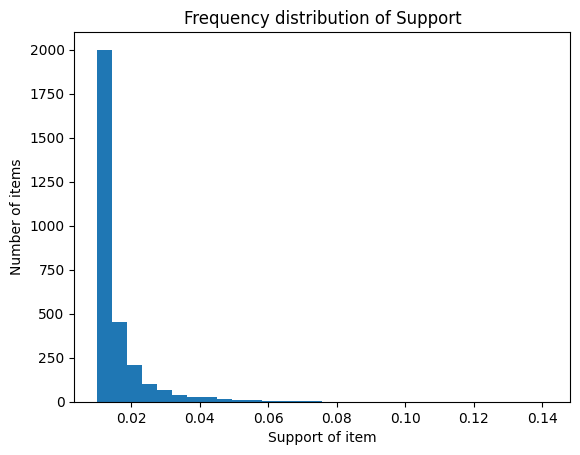

In [ ]:
# Using the 'hist' method to create a histogram of the 'support' column from the 'mod_colnames_minsupport' DataFrame.
# 'grid=False' removes the grid lines for a cleaner look, and 'bins=30' specifies that the data should be
# divided into 30 intervals for the histogram.
mod_colnames_minsupport.hist("support", grid=False, bins=30)

# Labeling the x-axis 'Support of item' which indicates the support values for the histogram.
plt.xlabel("Support of item")

# Labeling the y-axis 'Number of items' which represents the count of itemsets falling into each histogram bin.
plt.ylabel("Number of items")

# Adding a title 'Frequency distribution of Support' to the histogram, describing what the histogram is showing.
plt.title("Frequency distribution of Support")

# Displaying the histogram with the 'show' method. This will render the histogram on the screen.
plt.show()


The histogram's display of itemset support values indicates a common trend in retail: most products are rarely bought together. A significant number of itemsets have support values below 2%, pointing to only a few product pairs being frequently purchased. For a medium-sized online retailer, this data suggests a strategy focused on promoting these popular combinations, optimizing inventory for high-demand items, and potentially bundling less popular products with top-sellers to boost sales and improve customer purchase experience.

##Part 2: Finding the Association Rules on the Complete Online Retail Dataset

### 1.Fit Association Rule Model: Use the full dataset to generate association rules. Apply the confidence metric with a minimum threshold of 0.6.

###Confidence

In [ ]:
# Import the necessary function from mlxtend if not already done.
from mlxtend.frequent_patterns import association_rules

# Generate association rules from the 'mod_colnames_minsupport' DataFrame.
# The 'metric' parameter is set to "confidence" which measures the likelihood of item Y being purchased when item X is purchased.
# 'min_threshold=0.6' means that only the rules with a confidence level of 60% or higher will be considered.
# 'support_only=False' indicates that other metrics besides support should be considered when generating rules.
rules = mlxtend.frequent_patterns.association_rules(
    mod_colnames_minsupport,
    metric="confidence",
    min_threshold=0.6,
    support_only=False
)

# Display the first 7 association rules generated.
# The 'loc' method is used to select rows 0 to 6 from the 'rules' DataFrame.
rules.loc[0:6]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(SET OF 6 SPICE TINS PANTRY DESIGN),(SET OF 3 CAKE TINS PANTRY DESIGN ),0.0734,0.1050,0.0474,0.645777,6.150253,0.039693,2.526654,0.903740
1,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.0574,0.0574,0.0428,0.745645,12.990324,0.039505,3.705838,0.979227
2,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.0574,0.0574,0.0428,0.745645,12.990324,0.039505,3.705838,0.979227
3,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.0676,0.0890,0.0426,0.630178,7.080646,0.036584,2.463344,0.921032
4,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.0574,0.1010,0.0384,0.668990,6.623659,0.032603,2.715926,0.900728
5,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.0534,0.1416,0.0358,0.670412,4.734548,0.028239,2.604464,0.833284
6,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.0546,0.0520,0.0358,0.655678,12.609186,0.032961,2.753234,0.973866


### 2.Count and Compare Association Rules: Count the number of derived rules. Compare this with previous exercises.

In [ ]:
# Print the number of association rules generated in the 'rules' DataFrame.
# This is done by accessing the number of rows in the DataFrame with 'rules.shape[0]'.
print("Number of Associations: {}".format(rules.shape[0]))


Number of Associations: 1064


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###Lift

In [ ]:
# Generate a new set of association rules named 'rules2' from the 'mod_colnames_minsupport' DataFrame.
# This time, use 'lift' as the metric for determining the strength of an association.
# The minimum threshold for the lift is set very high at 50, meaning we are looking for very strong associations.
# 'support_only=False' means that the function will not only consider support but also the chosen metric, which is lift.
rules2 = mlxtend.frequent_patterns.association_rules(
    mod_colnames_minsupport,
    metric="lift",
    min_threshold=50,
    support_only=False
)

# Display the first 7 association rules generated in the 'rules2' DataFrame.
# It's noted that the order of the DataFrame might be slightly different due to the different sorting based on lift.
# The 'loc' method is used to select rows 0 to 6.
rules2.loc[0:6]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(HERB MARKER THYME),(HERB MARKER ROSEMARY),0.0142,0.0138,0.0130,0.915493,66.340069,0.012804,11.670033,0.999114
1,(HERB MARKER ROSEMARY),(HERB MARKER THYME),0.0138,0.0142,0.0130,0.942029,66.340069,0.012804,17.005050,0.998708
2,(HERB MARKER THYME),(HERB MARKER MINT),0.0142,0.0142,0.0126,0.887324,62.487602,0.012398,8.748975,0.998171
3,(HERB MARKER MINT),(HERB MARKER THYME),0.0142,0.0142,0.0126,0.887324,62.487602,0.012398,8.748975,0.998171
4,(HERB MARKER ROSEMARY),(HERB MARKER MINT),0.0138,0.0142,0.0124,0.898551,63.278220,0.012204,9.717171,0.997969
5,(HERB MARKER MINT),(HERB MARKER ROSEMARY),0.0142,0.0138,0.0124,0.873239,63.278220,0.012204,7.780022,0.998374
6,(HERB MARKER PARSLEY),(HERB MARKER THYME),0.0132,0.0142,0.0124,0.939394,66.154503,0.012213,16.265700,0.998058


In [ ]:
print("Number of Associations: {}".format(rules2.shape[0]))

Number of Associations: 170


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 3.Plot Confidence vs. Support: Create a plot to visualize the relationship between confidence and support for the rules.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


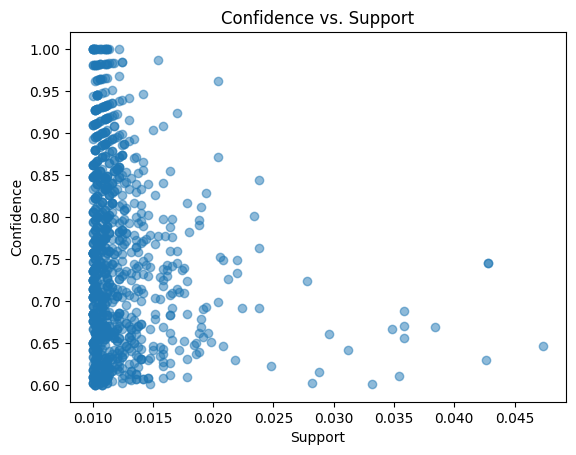

In [ ]:
# Create a scatter plot to visualize the relationship between 'support' and 'confidence' of the association rules.
# 'alpha=0.5' makes the points semi-transparent, which can help in visualizing the density of the points
# when they overlap.
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)

# Title of the plot, indicating what the plot represents.
plt.title('Confidence vs. Support')

# Label for the x-axis, representing the support metric of the rules on the plot.
plt.xlabel('Support')

# Label for the y-axis, representing the confidence metric of the rules on the plot.
plt.ylabel('Confidence')

# Display the plot on the screen. This will show the scatter plot with support on the x-axis and confidence on the y-axis.
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


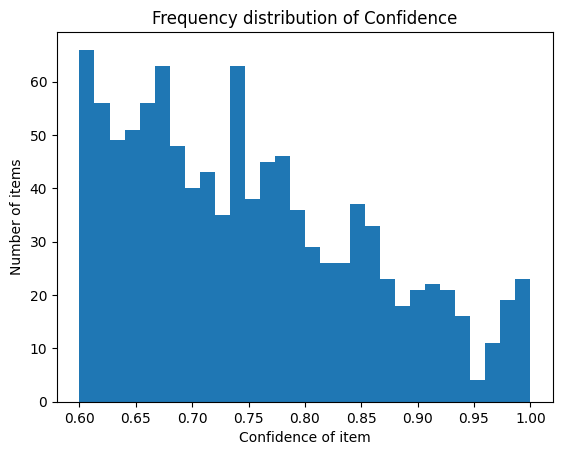

In [ ]:
# Create a histogram of the 'confidence' values from the 'rules' DataFrame.
# The 'grid=False' option turns off the grid to simplify the plot visually.
# 'bins=30' specifies that the data should be divided into 30 equal-width bins for the histogram.
rules.hist("confidence", grid=False, bins=30)

# Set the label for the x-axis to 'Confidence of item', which indicates what the histogram bars represent.
plt.xlabel("Confidence of item")

# Set the label for the y-axis to 'Number of items', which represents the number of rules falling into each confidence bin.
plt.ylabel("Number of items")

# Set the title of the histogram to 'Frequency distribution of Confidence', to provide context for what the chart represents.
plt.title("Frequency distribution of Confidence")

# Display the histogram. This command causes the figure to be shown to the user.
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


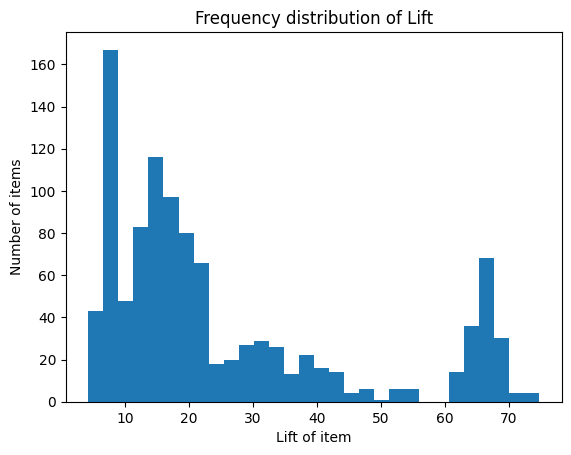

In [ ]:
# Create a histogram to visualize the distribution of 'lift' values from the 'rules' DataFrame.
# No grid is displayed in the background for a cleaner look (grid=False).
# The range of 'lift' values is divided into 30 bins, providing a detailed view of the distribution.
rules.hist("lift", grid=False, bins=30)

# Set the label for the x-axis as "Lift of item" to denote what the histogram's x-axis represents.
plt.xlabel("Lift of item")

# Set the label for the y-axis as "Number of items" indicating the count of rules within each bin of lift values.
plt.ylabel("Number of items")

# Title the histogram as "Frequency distribution of Lift" to clarify what the distribution is showing.
plt.title("Frequency distribution of Lift")

# Display the histogram to the user. This line generates the figure and shows it in the output.
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


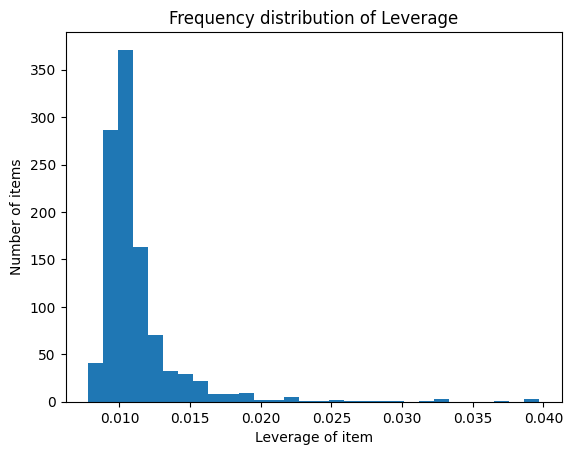

In [ ]:
# Create a histogram of the 'leverage' values from the 'rules' DataFrame.
# Turn off the grid for a neater appearance and set the number of bins to 30 for granularity.
rules.hist("leverage", grid=False, bins=30)

# Label the x-axis as 'Leverage of item' to represent the leverage metric from the association rules.
plt.xlabel("Leverage of item")

# Label the y-axis as 'Number of items' to denote the number of rules that fall within each leverage interval.
plt.ylabel("Number of items")

# Set the title of the histogram to 'Frequency distribution of Leverage' to describe what is being displayed.
plt.title("Frequency distribution of Leverage")

# Display the histogram, which will provide a visual representation of the distribution of leverage among the rules.
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


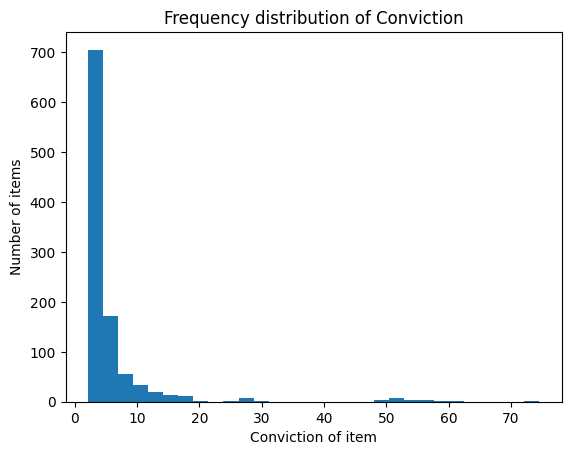

In [ ]:

import numpy as np

# Ensure the 'conviction' column has finite values to avoid errors during plotting.
# NaN or infinite values can result from rules with 100% confidence, which would give division by zero in conviction calculation.
finite_conviction_values = rules[np.isfinite(rules['conviction'])].conviction.values

# Plot a histogram of the finite 'conviction' values with 30 bins for granularity.
plt.hist(finite_conviction_values, bins=30)

# Label the x-axis as 'Conviction of item' to represent the metric from the association rules.
plt.xlabel("Conviction of item")

# Label the y-axis as 'Number of items' to indicate how many rules are counted in each bin of the histogram.
plt.ylabel("Number of items")

# Title the histogram as 'Frequency distribution of Conviction' to communicate what the chart represents.
plt.title("Frequency distribution of Conviction")

# Display the plot, showing the distribution of 'conviction' among the rules.
plt.show()


##Report writing

### 4.Analyze Rule Metrics: Examine the distributions of confidence, lift, leverage, and conviction in your rules.



*   **Insights gained from the Apriori algorithm and association rule mining.**

SPecific items, such as kitchenware sets, home decor, and novelty items, suggest distinct consumer patterns that are crucial for creating compelling marketing and sales strategies.
Items like the "COFFEE MUG CAT + BIRD DESIGN" and "GIN AND TONIC MUG" have similar support values, indicating potential for targeted advertising campaigns around these themes.
Multi-item sets like "SET OF 3 CAKE TINS PANTRY DESIGN" reveal opportunities for bundling and promoting collections, enhancing the appeal of buying in sets rather than individually.

*   **How these insights can influence business decisions like store layout and pricing.**

Considering the individual support values for distinct items allows a retailer to identify and promote products that have the potential to become bestsellers if marketed properly.
For products like “GROW YOUR OWN BASIL IN ENAMEL MUG” with a support value of 0.0140, strategic product placements can be made near related gardening or culinary items to enhance visibility and cross-selling opportunities.

*   **A comparison between the two datasets.**
*   **Reflections on how data partitioning and increasing data volume impact results.**



